# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1087]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [1088]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data1, data2 둘다 1000개
num_data = data1.shape[0]


label_1 = np.zeros(num_data)
label_2 = np.zeros(num_data)

for i in range(num_data):

    label_1[i] = data1[i,2]
    label_2[i] = data2[i,2]

    
#print(label_1.shape)
# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

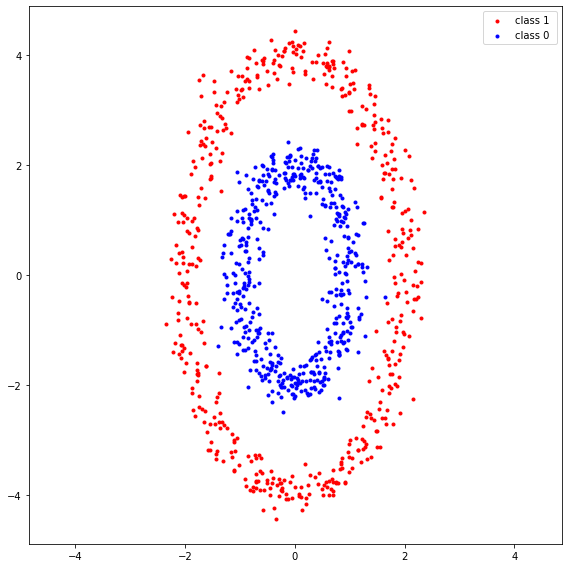

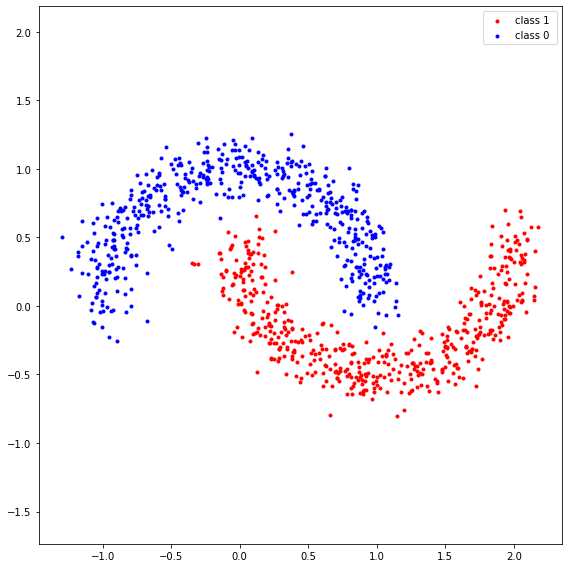

In [1089]:
plt.figure(figsize=(8,8))
plt.scatter(data1[:, 0][label_1 == 1],data1[:, 1][label_1 == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data1[:, 0][label_1 == 0],data1[:, 1][label_1 == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(8,8))
plt.scatter(data2[:, 0][label_2 == 1],data2[:, 1][label_2 == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data2[:, 0][label_2 == 0],data2[:, 1][label_2 == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.show()

## define the feature function for each data to obtain the best accuracy

In [1090]:
def feature_function1(x, y):
    
    feature = np.array([np.ones(x.size),x,y,x**2,y**2])
    
    return feature

In [1091]:
def feature_function2(x, y):
  
    feature = np.array([np.ones(x.size),x**2,y**2,x**3,y**3])

    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [1092]:
def regression_function(theta, feature):
    
    value = np.dot(theta,feature)
    
    return value

## define sigmoid function with input $x$

In [1093]:
def logistic_function(theta,feature):
    
    f = regression_function(theta,feature)
    z = 1/(1+np.exp(-f))
    
    #print(z.shape)
    
    return z

## define loss function with feature and label based on the logistic regression

In [1094]:
def compute_loss_feature(theta, feature, label):
    h = logistic_function(theta,feature)
    t = 0.00001
    loss = 0
    loss = -((1/num_data)* (np.dot(label, np.log(h + t) ) + np.dot((1-label),np.log(1-h + t) ) ))
    
    return loss

## define gradient vector for the model parameters $\theta$

In [1095]:
def compute_gradient_feature(theta, feature, label):    
    X = feature
    h = logistic_function(theta,feature)
    l = label
    gradient = (1/num_data)*np.dot(X,(h-l))
    
    return gradient

## compute the accuracy

In [1096]:
def compute_accuracy(theta, feature, label):
    
    h = np.array( logistic_function(theta,feature) )
    #print("h",h)
    computed_label = (h >= 0.5)
    #print("computed_label",computed_label)
    correct_matrix = (computed_label.astype(int) == label).astype(int)
    #print(correct_matrix)
    correct = np.sum(correct_matrix)
    #print("correct",correct)
    accuracy = correct/num_data
   
    return accuracy

## gradient descent for the model parameters $\theta$

In [1097]:
num_iteration   = 7000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.65   # USE THIS VALUE for the learning rate

theta1 = np.array((0,0,0,0,0))
theta2 = np.array((0,0,0,0,0))

theta1_iteration =np.zeros((num_iteration, theta1.size))
loss1_iteration = np.zeros(num_iteration, dtype=object)

theta2_iteration =np.zeros((num_iteration, theta2.size))
loss2_iteration = np.zeros(num_iteration, dtype=object)


In [1098]:
feature1 = feature_function1(data1[:, 0],data1[:, 1])
feature2 = feature_function2(data2[:, 0],data2[:, 1])

In [1099]:
for i in range(num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, label_1)
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, label_2)
    
    loss1 = compute_loss_feature(theta1, feature1, label_1)
    loss2 = compute_loss_feature(theta2, feature2, label_2)
    
    theta1_iteration[i] = theta1
    theta2_iteration[i] = theta2
    loss1_iteration[i] = loss1
    loss2_iteration[i] = loss2
    
    print("loss1",loss1_iteration[i]," theta1",theta1_iteration[i])
    print("loss2",loss2_iteration[i]," theta2",theta2_iteration[i])



theta1_optimal = theta1
theta2_optimal = theta2

loss1 1.1734248431729988  theta1 [ 0.00000000e+00 -7.19741750e-04 -2.78092750e-04  2.46991693e-01
  9.59220305e-01]
loss2 0.5480138513399603  theta2 [ 0.          0.16271775 -0.06341185  0.41566269 -0.07971509]
loss1 0.5922036451623922  theta1 [-0.25290584 -0.003151   -0.00268364  0.17837646  0.35300006]
loss2 0.5206520759199008  theta2 [-0.06635149  0.13062    -0.13176844  0.47327146 -0.15466489]
loss1 0.6694547324143157  theta1 [-0.41682153 -0.00406473 -0.00425649  0.21906096 -0.02441009]
loss2 0.4998261033799398  theta2 [-0.11815629  0.10239941 -0.19186974  0.52563523 -0.22235415]
loss1 1.3778465957276953  theta1 [-0.37595654 -0.00378103 -0.00140151  0.44740075  1.3058363 ]
loss2 0.4835902994753365  theta2 [-0.15825092  0.07708196 -0.24519294  0.57335624 -0.28402885]
loss1 0.7134200805564781  theta1 [-0.63771944 -0.00641199 -0.00371595  0.35552898  0.68147183]
loss2 0.47061120561246167  theta2 [-0.18893537  0.05392524 -0.29296335  0.61699244 -0.34073418]
loss1 0.42156707504745256  t

loss1 0.05711270893226122  theta1 [-5.15918127  0.00586805 -0.00589882  2.202472    0.60977098]
loss2 0.25490327691348813  theta2 [ 0.95647025 -1.9092513  -1.71229382  1.75571815 -2.99187178]
loss1 0.05680006461079759  theta1 [-5.17234482  0.00589902 -0.00586755  2.20783011  0.61114259]
loss2 0.2543959973423018  theta2 [ 0.96243268 -1.91967984 -1.71634329  1.76038543 -3.00403589]
loss1 0.056491387863916734  theta1 [-5.18542419  0.00592969 -0.00583619  2.21315457  0.61250581]
loss2 0.25389309509093144  theta2 [ 0.96835396 -1.93006522 -1.72035698  1.76504296 -3.01615518]
loss1 0.0561866025860574  theta1 [-5.19842048  0.00596004 -0.00580474  2.2184458   0.61386074]
loss2 0.25339450743575775  theta2 [ 0.97423456 -1.94040782 -1.72433525  1.76969074 -3.02823006]
loss1 0.05588563461061216  theta1 [-5.21133477  0.0059901  -0.0057732   2.22370423  0.61520747]
loss2 0.25290017283359173  theta2 [ 0.98007494 -1.95070804 -1.72827847  1.77432879 -3.04026098]
loss1 0.055588411648635254  theta1 [-5.22

loss1 0.03654823812833184  theta1 [-6.27458095e+00  8.01984107e-03 -2.09711132e-03  2.65788698e+00
  7.27292565e-01]
loss2 0.21589214558212372  theta2 [ 1.44480041 -2.87623767 -2.00275484  2.22325658 -4.14590353]
loss1 0.03644091632477864  theta1 [-6.28228146e+00  8.03072841e-03 -2.06191812e-03  2.66103573e+00
  7.28112915e-01]
loss2 0.21564901435195744  theta2 [ 1.44802285 -2.88350525 -2.00426095  2.22699363 -4.15478038]
loss1 0.03633437232229395  theta1 [-6.28995399e+00  8.04151182e-03 -2.02671888e-03  2.66417304e+00
  7.28930406e-01]
loss2 0.21540708761485342  theta2 [ 1.45123128 -2.89075474 -2.00575295  2.23072413 -4.163638  ]
loss1 0.03622859751040578  theta1 [-6.29759873e+00  8.05219207e-03 -1.99151387e-03  2.66729898e+00
  7.29745058e-01]
loss2 0.2151663543486192  theta2 [ 1.45442581 -2.89798624 -2.00723093  2.23444812 -4.17247653]
loss1 0.036123583406272974  theta1 [-6.30521590e+00  8.06276991e-03 -1.95630334e-03  2.67041365e+00
  7.30556893e-01]
loss2 0.21492680367000935  thet

loss1 0.025846449915368882  theta1 [-7.22403259e+00  8.80011503e-03  3.33320380e-03  3.04574535e+00
  8.29377792e-01]
loss2 0.1880500067708461  theta2 [ 1.82456847 -3.83882547 -2.11156963  2.7391479  -5.34396619]
loss1 0.025802080817482472  theta1 [-7.22898316e+00  8.80080186e-03  3.36768498e-03  3.04776398e+00
  8.29915134e-01]
loss2 0.18791452983171417  theta2 [ 1.82645771 -3.84421823 -2.1116712   2.74214095 -5.35078567]
loss1 0.025757912254912394  theta1 [-7.23392253e+00  8.80144778e-03  3.40215610e-03  3.04977798e+00
  8.30451314e-01]
loss2 0.18777944339083627  theta2 [ 1.82834179 -3.84960292 -2.11176712  2.74513051 -5.35759591]
loss1 0.025713942834978753  theta1 [-7.23885077e+00  8.80205298e-03  3.43661711e-03  3.05178738e+00
  8.30986339e-01]
loss2 0.18764474520845167  theta2 [ 1.83022073 -3.85497958 -2.11185743  2.7481166  -5.36439695]
loss1 0.025670171178006223  theta1 [-7.24376792e+00  8.80261769e-03  3.47106800e-03  3.05379221e+00
  8.31520212e-01]
loss2 0.18751043306346576  

loss1 0.021674473094487515  theta1 [-7.74653708e+00  8.64169772e-03  7.35999075e-03  3.25844860e+00
  8.86394007e-01]
loss2 0.17417576790457948  theta2 [ 2.01926389 -4.43173471 -2.09069168  3.07373502 -6.09873068]
loss1 0.021646839130771263  theta1 [-7.75044500e+00  8.63865679e-03  7.39314345e-03  3.26003645e+00
  8.86822796e-01]
loss2 0.1740749325204787  theta2 [ 2.0206864  -4.43635659 -2.09028327  3.07638374 -6.10464771]
loss1 0.021619301873698954  theta1 [-7.75434607e+00  8.63559221e-03  7.42628441e-03  3.26162148e+00
  8.87250871e-01]
loss2 0.17397431281405387  theta2 [ 2.02210596 -4.44097327 -2.08987167  3.07903007 -6.11055851]
loss1 0.021591860801885625  theta1 [-7.75824034e+00  8.63250410e-03  7.45941362e-03  3.26320369e+00
  8.87678234e-01]
loss2 0.17387390785482218  theta2 [ 2.02352258 -4.44558475 -2.08945689  3.081674   -6.11646308]
loss1 0.021564515397732218  theta1 [-7.76212782e+00  8.62939254e-03  7.49253109e-03  3.26478310e+00
  8.88104888e-01]
loss2 0.17377371671833913  

loss1 0.018778302965541678  theta1 [-8.19847736e+00  8.08967978e-03  1.15079578e-02  3.44173003e+00
  9.36224959e-01]
loss2 0.162757529470316  theta2 [ 2.18092124 -4.98592578 -2.01668926  3.39522443 -6.8107553 ]
loss1 0.018759813040187805  theta1 [-8.20167511e+00  8.08427823e-03  1.15396101e-02  3.44302417e+00
  9.36579329e-01]
loss2 0.16267836743058545  theta2 [ 2.18204629 -4.98999238 -2.01596771  3.39761073 -6.81599551]
loss1 0.018741375126527432  theta1 [-8.20486837e+00  8.07886253e-03  1.15712508e-02  3.44431646e+00
  9.36933226e-01]
loss2 0.16259933795982795  theta2 [ 2.18316951 -4.99405535 -2.01524433  3.39999527 -6.82123122]
loss1 0.018722988998692517  theta1 [-8.20805716e+00  8.07343273e-03  1.16028800e-02  3.44560690e+00
  9.37286653e-01]
loss2 0.16252044061544485  theta2 [ 2.18429093 -4.99811471 -2.01451912  3.40237807 -6.82646247]
loss1 0.01870465443213768  theta1 [-8.21124147e+00  8.06798888e-03  1.16344977e-02  3.44689548e+00
  9.37639611e-01]
loss2 0.16244167495712117  th

loss1 0.017140563698095284  theta1 [-8.50075453e+00  7.48073146e-03  1.46474429e-02  3.56387991e+00
  9.69838521e-01]
loss2 0.1553661143007418  theta2 [ 2.28629253 -5.379731   -1.9357032   3.62797353 -7.31892157]
loss1 0.017126372851589456  theta1 [-8.50355680e+00  7.47413700e-03  1.46779570e-02  3.56501051e+00
  9.70151250e-01]
loss2 0.15529843251602876  theta2 [ 2.28726089 -5.38347189 -1.9348301   3.63019997 -7.32375461]
loss1 0.017112216553967934  theta1 [-8.50635566e+00  7.46753280e-03  1.47084602e-02  3.56613971e+00
  9.70463621e-01]
loss2 0.15523084798104186  theta2 [ 2.28822793 -5.38720991 -1.93395579  3.63242499 -7.32858404]
loss1 0.01709809467520621  theta1 [-8.50915113e+00  7.46091889e-03  1.47389524e-02  3.56726751e+00
  9.70775634e-01]
loss2 0.15516336042259507  theta2 [ 2.28919366 -5.39094506 -1.93308028  3.63464857 -7.33340986]
loss1 0.017084007085940104  theta1 [-8.51194321e+00  7.45429531e-03  1.47694336e-02  3.56839390e+00
  9.71087289e-01]
loss2 0.1550959695687039  th

loss1 0.015216953376036155  theta1 [-8.91555724e+00  6.30655373e-03  1.94522212e-02  3.73085330e+00
  1.01636305e+00]
loss2 0.1455079050119238  theta2 [ 2.42829854 -5.9519738  -1.78149135  3.97164054 -8.05905722]
loss1 0.015207029398514997  theta1 [-8.91790175e+00  6.29875927e-03  1.94810436e-02  3.73179478e+00
  1.01662738e+00]
loss2 0.145453091471585  theta2 [ 2.42909475 -5.95531532 -1.78047572  3.97366468 -8.0633829 ]
loss1 0.015197125280520907  theta1 [-8.92024392e+00  6.29095935e-03  1.95098561e-02  3.73273530e+00
  1.01689146e+00]
loss2 0.14539834278143612  theta2 [ 2.42989011 -5.95865473 -1.77945947  3.97568773 -8.06770587]
loss1 0.015187240960507534  theta1 [-8.92258376e+00  6.28315397e-03  1.95386586e-02  3.73367485e+00
  1.01715530e+00]
loss2 0.14534365879705616  theta2 [ 2.43068462 -5.96199201 -1.77844262  3.97770968 -8.07202613]
loss1 0.015177376377186124  theta1 [-8.92492126e+00  6.27534315e-03  1.95674513e-02  3.73461343e+00
  1.01741889e+00]
loss2 0.14528903937453055  th

loss1 0.014160405714852206  theta1 [-9.17935444e+00  5.34540589e-03  2.28142655e-02  3.83661679e+00
  1.04620616e+00]
loss2 0.13940448478425677  theta2 [ 2.51757154 -6.33561034 -1.6570026   4.20524299 -8.55587668]
loss1 0.014152474045973714  theta1 [-9.18145113e+00  5.33707983e-03  2.28419534e-02  3.83745602e+00
  1.04644419e+00]
loss2 0.13935649615826742  theta2 [ 2.51827899 -6.33872161 -1.65593064  4.20714719 -8.55990728]
loss1 0.0141445564080945  theta1 [-9.18354597e+00  5.32875021e-03  2.28696321e-02  3.83829449e+00
  1.04668202e+00]
loss2 0.13930855818604307  theta2 [ 2.51898578 -6.34183111 -1.65485833  4.20905047 -8.56393562]
loss1 0.01413665276273156  theta1 [-9.18563897e+00  5.32041703e-03  2.28973016e-02  3.83913219e+00
  1.04691966e+00]
loss2 0.1392606707696654  theta2 [ 2.51969193 -6.34493885 -1.65378567  4.21095283 -8.56796169]
loss1 0.014128763071544533  theta1 [-9.18773012e+00  5.31208030e-03  2.29249620e-02  3.83996914e+00
  1.04715710e+00]
loss2 0.13921283381151267  the

loss1 0.013344738558328186  theta1 [-9.40532320e+00  4.38479571e-03  2.58863937e-02  3.92693362e+00
  1.07193795e+00]
loss2 0.13428113184705953  theta2 [ 2.59369556 -6.67656791 -1.53402096  4.41480105 -8.99770594]
loss1 0.01333817845082692  theta1 [-9.40723058e+00  4.37614045e-03  2.59130833e-02  3.92769484e+00
  1.07215583e+00]
loss2 0.1342383097602081  theta2 [ 2.59433736 -6.67949435 -1.5329191   4.41660719 -9.00149926]
loss1 0.01333162879353784  theta1 [-9.40913644e+00  4.36748286e-03  2.59397643e-02  3.92845543e+00
  1.07237356e+00]
loss2 0.13419552888595637  theta2 [ 2.59497864 -6.68241929 -1.53181706  4.41841252 -9.00529064]
loss1 0.013325089560624103  theta1 [-9.41104079e+00  4.35882297e-03  2.59664368e-02  3.92921541e+00
  1.07259112e+00]
loss2 0.13415278915335507  theta2 [ 2.59561941 -6.6853427  -1.53071483  4.42021704 -9.00908007]
loss1 0.013318560726335221  theta1 [-9.41294364e+00  4.35016077e-03  2.59931008e-02  3.92997476e+00
  1.07280852e+00]
loss2 0.13411009049164468  th

loss1 0.012675108601836748  theta1 [-9.60832077e+00  3.41181475e-03  2.87981496e-02  4.00783905e+00
  1.09519307e+00]
loss2 0.12976479846312317  theta2 [ 2.66197747 -6.99255544 -1.4108231   4.61052566 -9.4074132 ]
loss1 0.012669567925890454  theta1 [-9.61007418e+00  3.40295329e-03  2.88239267e-02  4.00853691e+00
  1.09539453e+00]
loss2 0.12972615608185203  theta2 [ 2.66256725 -6.99532455 -1.40970713  4.61224701 -9.41100475]
loss1 0.012664035288637722  theta1 [-9.61182632e+00  3.39409038e-03  2.88496958e-02  4.00923424e+00
  1.09559585e+00]
loss2 0.12968754805753488  theta2 [ 2.66315661 -6.99809234 -1.40859109  4.61396765 -9.4145946 ]
loss1 0.012658510671960162  theta1 [-9.61357720e+00  3.38522605e-03  2.88754570e-02  4.00993106e+00
  1.09579704e+00]
loss2 0.1296489743366177  theta2 [ 2.66374554 -7.00085881 -1.40747498  4.61568757 -9.41818275]
loss1 0.012652994057794626  theta1 [-9.61532681e+00  3.37636030e-03  2.89012102e-02  4.01062735e+00
  1.09599810e+00]
loss2 0.12961043486567494  

loss1 0.011875558718635404  theta1 [-9.87549860e+00  1.97077106e-03  3.28493297e-02  4.11397903e+00
  1.12601197e+00]
loss2 0.12395246634510146  theta2 [ 2.75192927 -7.42227099 -1.23071666  4.87886678 -9.96504773]
loss1 0.011871111618182538  theta1 [-9.87707007e+00  1.96175397e-03  3.28738901e-02  4.11460213e+00
  1.12619398e+00]
loss2 0.12391874302781351  theta2 [ 2.75245911 -7.42484437 -1.22959813  4.88048095 -9.96838918]
loss1 0.011866670228533443  theta1 [-9.87864053e+00  1.95273632e-03  3.28984434e-02  4.11522481e+00
  1.12637588e+00]
loss2 0.12388504684733312  theta2 [ 2.75298863 -7.42741662 -1.22847962  4.8820945  -9.97172921]
loss1 0.01186223453828056  theta1 [-9.88020999e+00  1.94371812e-03  3.29229895e-02  4.11584709e+00
  1.12655766e+00]
loss2 0.12385137776627633  theta2 [ 2.75351782 -7.42998777 -1.22736115  4.88370744 -9.97506781]
loss1 0.01185780453604716  theta1 [-9.88177844e+00  1.93469937e-03  3.29475284e-02  4.11646895e+00
  1.12673935e+00]
loss2 0.12381773574733689  t

loss1 0.011391246260512659  theta1 [-1.00528700e+01  9.13057083e-04  3.56751718e-02  4.18421889e+00
  1.14661105e+00]
loss2 0.12018180488365764  theta2 [  2.81182205  -7.71606286  -1.10019594   5.06367968 -10.34672114]
loss1 0.01138739722024777  theta1 [-1.00543323e+01  9.04001869e-04  3.56989186e-02  4.18479724e+00
  1.14678136e+00]
loss2 0.12015102156573158  theta2 [  2.81231669  -7.71851283  -1.09908439   5.06522528 -10.34990576]
loss1 0.011383552740889733  theta1 [-1.00557938e+01  8.94946540e-04  3.57226586e-02  4.18537523e+00
  1.14695158e+00]
loss2 0.12012026148527116  theta2 [  2.81281107  -7.72096181  -1.09797292   5.06677032 -10.35308911]
loss1 0.011379712814024253  theta1 [-1.00572545e+01  8.85891099e-04  3.57463920e-02  4.18595287e+00
  1.14712171e+00]
loss2 0.12008952461265358  theta2 [  2.81330516  -7.72340979  -1.09686153   5.0683148  -10.3562712 ]
loss1 0.011375877431258043  theta1 [-1.00587143e+01  8.76835551e-04  3.57701186e-02  4.18653016e+00
  1.14729174e+00]
loss2 0

loss1 0.010973186673932656  theta1 [-1.02170044e+01 -1.37348924e-04  3.83859146e-02  4.24905385e+00
  1.16577660e+00]
loss2 0.11675880624306337  theta2 [  2.86744728  -7.99383425  -0.97189388   5.23936632 -10.70800563]
loss1 0.010969815464307944  theta1 [-1.02183733e+01 -1.46397826e-04  3.84089064e-02  4.24959392e+00
  1.16593687e+00]
loss2 0.11673053416329755  theta2 [  2.86791218  -7.99617438  -0.9707941    5.24085022 -10.71105137]
loss1 0.010966447964540497  theta1 [-1.02197415e+01 -1.55446518e-04  3.84318919e-02  4.25013369e+00
  1.16609707e+00]
loss2 0.11670228222582658  theta2 [  2.86837685  -7.99851362  -0.96969443   5.24233362 -10.71409598]
loss1 0.010963084168268583  theta1 [-1.02211089e+01 -1.64494997e-04  3.84548711e-02  4.25067314e+00
  1.16625718e+00]
loss2 0.1166740504066815  theta2 [  2.86884128  -8.00085195  -0.96859487   5.24381652 -10.71713945]
loss1 0.01095972406914526  theta1 [-1.02224756e+01 -1.73543261e-04  3.84778440e-02  4.25121229e+00
  1.16641722e+00]
loss2 0.

loss1 0.010593456876836353  theta1 [-1.03761484e+01 -1.22108570e-03  4.11008953e-02  4.31176487e+00
  1.18445835e+00]
loss2 0.11350356795664512  theta2 [  2.92161927  -8.26843881  -0.84082149   5.41391747 -11.06567618]
loss1 0.010590489246918182  theta1 [-1.03774331e+01 -1.23009374e-03  4.11231549e-02  4.31227048e+00
  1.18460957e+00]
loss2 0.11347755283161357  theta2 [  2.92205765  -8.27067627  -0.83973735   5.41534314 -11.0685928 ]
loss1 0.010587524657904605  theta1 [-1.03787171e+01 -1.23910131e-03  4.11454086e-02  4.31277582e+00
  1.18476071e+00]
loss2 0.11345155524638395  theta2 [  2.92249582  -8.27291291  -0.83865335   5.41676834 -11.0715084 ]
loss1 0.01058456310493579  theta1 [-1.03800005e+01 -1.24810842e-03  4.11676564e-02  4.31328090e+00
  1.18491178e+00]
loss2 0.11342557518138352  theta2 [  2.92293379  -8.27514873  -0.83756949   5.41819308 -11.07442298]
loss1 0.010581604583162376  theta1 [-1.03812832e+01 -1.25711507e-03  4.11898983e-02  4.31378570e+00
  1.18506278e+00]
loss2 0

loss1 0.010141656590879122  theta1 [-1.05797363e+01 -2.69998874e-03  4.46960147e-02  4.39176566e+00
  1.20850517e+00]
loss2 0.10943488120457502  theta2 [  2.99133282  -8.62706061  -0.66395889   5.64311113 -11.53371115]
loss1 0.010139131915699163  theta1 [-1.05809216e+01 -2.70889955e-03  4.47173398e-02  4.39223069e+00
  1.20864567e+00]
loss2 0.10941151678039086  theta2 [  2.9917402   -8.62917198  -0.66289994   5.64446452 -11.53647025]
loss1 0.010136609603253076  theta1 [-1.05821064e+01 -2.71780967e-03  4.47386595e-02  4.39269548e+00
  1.20878611e+00]
loss2 0.10938816705028549  theta2 [  2.99214741  -8.63128264  -0.66184116   5.64581749 -11.53922846]
loss1 0.0101340896500881  theta1 [-1.05832906e+01 -2.72671908e-03  4.47599737e-02  4.39316006e+00
  1.20892649e+00]
loss2 0.10936483199910842  theta2 [  2.99255445  -8.63339257  -0.66078253   5.64717005 -11.54198577]
loss1 0.010131572052758315  theta1 [-1.05844742e+01 -2.73562778e-03  4.47812825e-02  4.39362440e+00
  1.20906681e+00]
loss2 0.

loss1 0.009868274958918207  theta1 [-1.07114269e+01 -3.71102784e-03  4.70927412e-02  4.44337820e+00
  1.22415160e+00]
loss2 0.10686248173956099  theta2 [  3.03670968  -8.86326066  -0.54429924   5.79479757 -11.8426614 ]
loss1 0.009865998932969635  theta1 [-1.07125526e+01 -3.71985155e-03  4.71134642e-02  4.44381890e+00
  1.22428565e+00]
loss2 0.10684069996972187  theta2 [  3.03709857  -8.86529353  -0.54325921   5.79610552 -11.84532303]
loss1 0.009863724916379548  theta1 [-1.07136777e+01 -3.72867444e-03  4.71341822e-02  4.44425940e+00
  1.22441966e+00]
loss2 0.10681893130129527  theta2 [  3.03748732  -8.86732574  -0.54221935   5.79741308 -11.84798385]
loss1 0.009861452906375735  theta1 [-1.07148023e+01 -3.73749651e-03  4.71548950e-02  4.44469969e+00
  1.22455361e+00]
loss2 0.10679717572142565  theta2 [  3.03787591  -8.86935729  -0.54117965   5.79872026 -11.85064385]
loss1 0.009859182900191155  theta1 [-1.07159265e+01 -3.74631775e-03  4.71756027e-02  4.44513978e+00
  1.22468751e+00]
loss2 

loss1 0.009608760474723518  theta1 [-1.08430942e+01 -4.76378090e-03  4.95435302e-02  4.49487328e+00
  1.23986991e+00]
loss2 0.10433874468455819  theta2 [  3.08232404  -9.10261186  -0.42071729   5.94907632 -12.1563785 ]
loss1 0.009606707139339794  theta1 [-1.08441636e+01 -4.77250037e-03  4.95636543e-02  4.49529106e+00
  1.23999788e+00]
loss2 0.10431844808400714  theta2 [  3.08269557  -9.10456858  -0.41969788   5.95033987 -12.15894606]
loss1 0.009604655514482236  theta1 [-1.08452325e+01 -4.78121892e-03  4.95837735e-02  4.49570867e+00
  1.24012581e+00]
loss2 0.10429816316176299  theta2 [  3.08306695  -9.10652469  -0.41867865   5.95160306 -12.16151287]
loss1 0.009602605597922137  theta1 [-1.08463010e+01 -4.78993656e-03  4.96038879e-02  4.49612609e+00
  1.24025368e+00]
loss2 0.10427788990690837  theta2 [  3.0834382   -9.10848019  -0.41765959   5.9528659  -12.16407892]
loss1 0.009600557387434736  theta1 [-1.08473690e+01 -4.79865329e-03  4.96239974e-02  4.49654333e+00
  1.24038151e+00]
loss2 

loss1 0.009390811145614242  theta1 [-1.09591696e+01 -5.72593590e-03  5.17481751e-02  4.54017950e+00
  1.25379057e+00]
loss2 0.10215477985982785  theta2 [  3.12275438  -9.31617687  -0.30862832   6.08720118 -12.43690919]
loss1 0.009388934895677574  theta1 [-1.09601920e+01 -5.73455046e-03  5.17677741e-02  4.54057818e+00
  1.25391346e+00]
loss2 0.10213571596072457  theta2 [  3.12311144  -9.31806836  -0.30762831   6.08842644 -12.43939654]
loss1 0.00938706013109412  theta1 [-1.09612140e+01 -5.74316405e-03  5.17873684e-02  4.54097670e+00
  1.25403630e+00]
loss2 0.102116662610996  theta2 [  3.12346837  -9.31995929  -0.30662847   6.08965137 -12.44188319]
loss1 0.009385186850023321  theta1 [-1.09622356e+01 -5.75177665e-03  5.18069582e-02  4.54137506e+00
  1.25415910e+00]
loss2 0.10209761980118504  theta2 [  3.12382518  -9.32184965  -0.30562881   6.09087597 -12.44436915]
loss1 0.009383315050627686  theta1 [-1.09632568e+01 -5.76038829e-03  5.18265433e-02  4.54177324e+00
  1.25428185e+00]
loss2 0.1

loss1 0.009141809645670988  theta1 [-1.10985291e+01 -6.92229223e-03  5.44480675e-02  4.59446020e+00
  1.27058479e+00]
loss2 0.09958442166624644  theta2 [  3.17157968  -9.57562824  -0.17033264   6.25557591 -12.77857371]
loss1 0.009140124726216736  theta1 [-1.10994982e+01 -6.93076619e-03  5.44670404e-02  4.59483722e+00
  1.27070189e+00]
loss2 0.09956674771621157  theta2 [  3.17192033  -9.57744375  -0.16935716   6.25675628 -12.78096804]
loss1 0.009138441061821285  theta1 [-1.11004669e+01 -6.93923912e-03  5.44860089e-02  4.59521409e+00
  1.27081895e+00]
loss2 0.0995490830993902  theta2 [  3.17226087  -9.57925874  -0.16838186   6.25793633 -12.78336174]
loss1 0.009136758651019927  theta1 [-1.11014353e+01 -6.94771102e-03  5.45049732e-02  4.59559082e+00
  1.27093597e+00]
loss2 0.09953142780781975  theta2 [  3.17260129  -9.5810732   -0.16740673   6.25911608 -12.7857548 ]
loss1 0.009135077492350293  theta1 [-1.11024033e+01 -6.95618189e-03  5.45239331e-02  4.59596741e+00
  1.27105295e+00]
loss2 0

loss1 0.008962134139153552  theta1 [-1.12039638e+01 -7.85654937e-03  5.65280022e-02  4.63544384e+00
  1.28335111e+00]
loss2 0.09767788136637842  theta2 [  3.20873492  -9.77404534  -0.06311804   6.38475189 -13.0405581 ]
loss1 0.00896058007696145  theta1 [-1.12048946e+01 -7.86490729e-03  5.65465051e-02  4.63580534e+00
  1.28346405e+00]
loss2 0.09766119681511358  theta2 [  3.2090638   -9.77580502  -0.06216186   6.38589906 -13.04288439]
loss1 0.008959027120432042  theta1 [-1.12058252e+01 -7.87326415e-03  5.65650038e-02  4.63616672e+00
  1.28357696e+00]
loss2 0.09764452076812881  theta2 [  3.20939258  -9.77756422  -0.06120586   6.38704594 -13.04521008]
loss1 0.008957475268331933  theta1 [-1.12067553e+01 -7.88161995e-03  5.65834984e-02  4.63652796e+00
  1.28368983e+00]
loss2 0.09762785321843212  theta2 [  3.20972126  -9.77932293  -0.06025003   6.38819253 -13.04753517]
loss1 0.008955924519429594  theta1 [-1.12076852e+01 -7.88997469e-03  5.66019889e-02  4.63688907e+00
  1.28380267e+00]
loss2 0

loss1 0.008719819120988808  theta1 [-1.13532664e+01 -9.22114119e-03  5.95262809e-02  4.69335546e+00
  1.30152063e+00]
loss2 0.09503508096157778  theta2 [  3.26167969 -10.05801037   0.09232959   6.57021948 -13.41664056]
loss1 0.008718432078212712  theta1 [-1.13541460e+01 -9.22932200e-03  5.95441243e-02  4.69369621e+00
  1.30162800e+00]
loss2 0.0950197105698957  theta2 [  3.26199279 -10.05969342   0.09325758   6.57132078 -13.41887381]
loss1 0.00871704596044013  theta1 [-1.13550253e+01 -9.23750173e-03  5.95619638e-02  4.69403684e+00
  1.30173533e+00]
loss2 0.09500434762905638  theta2 [  3.26230579 -10.06137602   0.0941854    6.57242182 -13.42110652]
loss1 0.008715660766702776  theta1 [-1.13559044e+01 -9.24568038e-03  5.95797994e-02  4.69437735e+00
  1.30184264e+00]
loss2 0.09498899213324297  theta2 [  3.2626187  -10.06305818   0.09511305   6.57352259 -13.4233387 ]
loss1 0.008714276496033737  theta1 [-1.13567831e+01 -9.25385794e-03  5.95976312e-02  4.69471775e+00
  1.30194991e+00]
loss2 0.

loss1 0.008573880124390048  theta1 [-1.14474668e+01 -1.01064481e-02  6.14487942e-02  4.72981857e+00
  1.31304103e+00]
loss2 0.09340237683029372  theta2 [  3.29528942 -10.23890388   0.19249475   6.68872254 -13.65696915]
loss1 0.00857258848319256  theta1 [-1.14483157e+01 -1.01145102e-02  6.14662256e-02  4.73014691e+00
  1.31314505e+00]
loss2 0.09338778561799277  theta2 [  3.29559305 -10.24054001   0.19340455   6.68979561 -13.65914567]
loss1 0.008571297669058961  theta1 [-1.14491644e+01 -1.01225712e-02  6.14836532e-02  4.73047514e+00
  1.31324905e+00]
loss2 0.09337320125781437  theta2 [  3.2958966  -10.24217573   0.19431419   6.69086842 -13.66132167]
loss1 0.008570007681157375  theta1 [-1.14500128e+01 -1.01306312e-02  6.15010771e-02  4.73080327e+00
  1.31335302e+00]
loss2 0.09335862374457952  theta2 [  3.29620006 -10.24381102   0.19522367   6.69194097 -13.66349718]
loss1 0.008568718518657065  theta1 [-1.14508610e+01 -1.01386900e-02  6.15184973e-02  4.73113128e+00
  1.31345695e+00]
loss2 0

loss1 0.00841142573220774  theta1 [-1.15564394e+01 -1.11532719e-02  6.37013253e-02  4.77192629e+00
  1.32642399e+00]
loss2 0.0915474389511734  theta2 [  3.33437216 -10.44975951   0.31028727   6.82719155 -13.93789616]
loss1 0.00841023574683641  theta1 [-1.15572543e+01 -1.11611906e-02  6.37182841e-02  4.77224091e+00
  1.32652430e+00]
loss2 0.09153370316918334  theta2 [  3.33466529 -10.45134274   0.31117577   6.82823261 -13.94000888]
loss1 0.008409046488548197  theta1 [-1.15580691e+01 -1.11691083e-02  6.37352395e-02  4.77255543e+00
  1.32662460e+00]
loss2 0.09151997360445527  theta2 [  3.33495833 -10.45292559   0.3120641    6.82927344 -13.94212113]
loss1 0.008407857956644676  theta1 [-1.15588836e+01 -1.11770249e-02  6.37521914e-02  4.77286985e+00
  1.32672486e+00]
loss2 0.09150625025246173  theta2 [  3.3352513  -10.45450805   0.31295228   6.83031403 -13.94423291]
loss1 0.00840667015042832  theta1 [-1.15596978e+01 -1.11849404e-02  6.37691397e-02  4.77318417e+00
  1.32682510e+00]
loss2 0.09

loss1 0.008271415609060782  theta1 [-11.65408486  -0.01211129   0.06574475   4.80958982   1.33846793]
loss2 0.08991626527937036  theta2 [  3.36957988 -10.64009307   0.4175123    6.95248741 -14.1922533 ]
loss1 0.008270309428904698  theta1 [-11.65487075  -0.01211907   0.06576129   4.80989269   1.33856506]
loss2 0.08990325588046881  theta2 [  3.36986397 -10.64163015   0.41838153   6.95350042 -14.1943105 ]
loss1 0.008269203896924959  theta1 [-11.65565641  -0.01212686   0.06577783   4.81019547   1.33866217]
loss2 0.08989025217842025  theta2 [  3.37014799 -10.64316686   0.41925061   6.9545132  -14.19636726]
loss1 0.008268099012523965  theta1 [-11.65644185  -0.01213464   0.06579436   4.81049816   1.33875926]
loss2 0.0898772541692118  theta2 [  3.37043194 -10.64470321   0.42011953   6.95552576 -14.19842359]
loss1 0.008266994775104867  theta1 [-11.65722705  -0.01214242   0.06581089   4.81080076   1.33885632]
loss2 0.08986426184883428  theta2 [  3.37071582 -10.64623919   0.42098829   6.95653809 

loss1 0.008101280381242021  theta1 [-11.77775483  -0.01335072   0.06836523   4.85719943   1.35379401]
loss2 0.08789248918856477  theta2 [  3.4144288  -10.88295964   0.55548194   7.1127713  -14.51793794]
loss1 0.008100271340830986  theta1 [-11.77850557  -0.01335833   0.06838125   4.85748813   1.3538873 ]
loss2 0.0878803478300971  theta2 [  3.41470194 -10.88443993   0.55632664   7.1137496  -14.51992701]
loss1 0.008099262861264925  theta1 [-11.7792561   -0.01336594   0.06839726   4.85777675   1.35398056]
loss2 0.08786821156943955  theta2 [  3.41497501 -10.88591987   0.55717119   7.1147277  -14.52191566]
loss1 0.008098254942052834  theta1 [-11.78000642  -0.01337355   0.06841327   4.85806528   1.3540738 ]
loss2 0.08785608040314853  theta2 [  3.41524802 -10.88739948   0.55801559   7.11570559 -14.52390392]
loss1 0.008097247582704295  theta1 [-11.78075654  -0.01338115   0.06842927   4.85835373   1.35416702]
loss2 0.08784395432778351  theta2 [  3.41552097 -10.88887875   0.55885984   7.11668327 

loss1 0.007983121616081192  theta1 [-11.86712059  -0.01426376   0.07028037   4.89153845   1.36492011]
loss2 0.08645942965047024  theta2 [  3.44701818 -11.05965733   0.65661953   7.22966354 -14.75572076]
loss1 0.007982177034140997  theta1 [-11.86784706  -0.01427124   0.07029601   4.89181738   1.36501073]
loss2 0.0864478810160378  theta2 [  3.44728373 -11.06109772   0.65744648   7.23061735 -14.75766206]
loss1 0.007981232957631635  theta1 [-11.86857333  -0.01427872   0.07031165   4.89209622   1.36510134]
loss2 0.08643633708490703  theta2 [  3.44754922 -11.06253778   0.65827328   7.23157097 -14.75960297]
loss1 0.007980289386126799  theta1 [-11.86929941  -0.0142862    0.07032728   4.89237499   1.36519192]
loss2 0.08642479785399516  theta2 [  3.44781465 -11.06397753   0.65909994   7.23252439 -14.76154351]
loss1 0.007979346319200654  theta1 [-11.8700253   -0.01429368   0.07034291   4.89265368   1.36528248]
loss2 0.08641326332022237  theta2 [  3.44808001 -11.06541695   0.65992646   7.23347761 

loss1 0.007878595398119833  theta1 [-11.94871726  -0.01510966   0.07204404   4.92284472   1.37511721]
loss2 0.08517245607956542  theta2 [  3.47690775 -11.22183241   0.74997217   7.3371486  -14.97460322]
loss1 0.007877705802244558  theta1 [-11.94942236  -0.01511702   0.07205934   4.92311504   1.37520548]
loss2 0.08516142441267627  theta2 [  3.47716658 -11.22323719   0.75078293   7.33808047 -14.97650197]
loss1 0.007876816666182694  theta1 [-11.95012727  -0.01512438   0.07207464   4.9233853    1.37529374]
loss2 0.08515039711480014  theta2 [  3.47742537 -11.22464168   0.75159356   7.33901216 -14.97840035]
loss1 0.007875927989559328  theta1 [-11.95083201  -0.01513174   0.07208994   4.92365548   1.37538197]
loss2 0.08513937418315126  theta2 [  3.47768409 -11.22604585   0.75240404   7.33994366 -14.98029837]
loss1 0.007875039771999945  theta1 [-11.95153656  -0.01513909   0.07210523   4.92392558   1.37547019]
loss2 0.08512835561494624  theta2 [  3.47794276 -11.22744973   0.75321438   7.34087497

loss1 0.007777538429104803  theta1 [-12.03000768  -0.01596355   0.07381475   4.95398822   1.38531291]
loss2 0.08391069212659134  theta2 [  3.50681213 -11.384163     0.84389384   7.44492385 -15.19433338]
loss1 0.007776700191014475  theta1 [-12.03069221  -0.01597078   0.07382971   4.95425028   1.38539893]
loss2 0.08390015334415682  theta2 [  3.50706448 -11.38553309   0.84468853   7.44583428 -15.19619072]
loss1 0.007775862371544701  theta1 [-12.03137657  -0.01597802   0.07384468   4.95451227   1.38548492]
loss2 0.08388961862065449  theta2 [  3.50731679 -11.3869029    0.84548309   7.44674453 -15.19804771]
loss1 0.007775024970365418  theta1 [-12.03206075  -0.01598525   0.07385964   4.9547742    1.3855709 ]
loss2 0.08387908795356615  theta2 [  3.50756904 -11.38827243   0.84627751   7.44765459 -15.19990436]
loss1 0.0077741879871469485  theta1 [-12.03274477  -0.01599249   0.0738746    4.95503605   1.38565686]
loss2 0.08386856134037583  theta2 [  3.50782123 -11.38964166   0.84707179   7.4485644

loss1 0.007651637634640824  theta1 [-12.13479121  -0.01707992   0.07611629   4.99406532   1.3985104 ]
loss2 0.08231420096955239  theta2 [  3.54554623 -11.5944832    0.96625674   7.58483178 -15.48000463]
loss1 0.007650860919634173  theta1 [-12.13545024  -0.01708699   0.07613083   4.99431714   1.39859361]
loss2 0.08230426621253457  theta2 [  3.54579052 -11.59580973   0.96703083   7.58571515 -15.48181   ]
loss1 0.007650084575754814  theta1 [-12.13610912  -0.01709407   0.07614537   4.9945689    1.39867679]
loss2 0.0822943351461443  theta2 [  3.54603475 -11.59713598   0.96780479   7.58659836 -15.48361506]
loss1 0.007649308602722503  theta1 [-12.13676785  -0.01710114   0.0761599    4.9948206    1.39875996]
loss2 0.08228440776817139  theta2 [  3.54627894 -11.59846196   0.96857862   7.58748139 -15.48541979]
loss1 0.00764853300025729  theta1 [-12.13742641  -0.01710821   0.07617444   4.99507224   1.39884312]
loss2 0.08227448407640733  theta2 [  3.54652308 -11.59978767   0.96935233   7.58836427 -

loss1 0.007566890346718392  theta1 [-12.20764676  -0.01786607   0.07772856   5.02188612   1.40772376]
loss2 0.08122395638034957  theta2 [  3.57260218 -11.74140049   1.05216146   7.68274015 -15.68023689]
loss1 0.0075661535193097896  theta1 [-12.20828872  -0.01787303   0.07774281   5.02213109   1.40780508]
loss2 0.08121442163663908  theta2 [  3.57284104 -11.74269746   1.05292133   7.68360511 -15.68200705]
loss1 0.007565417033347709  theta1 [-12.20893054  -0.01787999   0.07775706   5.02237601   1.40788638]
loss2 0.0812048903468652  theta2 [  3.57307985 -11.74399417   1.05368108   7.68446991 -15.68377691]
loss1 0.0075646808885819275  theta1 [-12.20957221  -0.01788695   0.0777713    5.02262087   1.40796767]
loss2 0.0811953625090095  theta2 [  3.57331861 -11.74529062   1.0544407    7.68533455 -15.68554646]
loss1 0.007563945084762457  theta1 [-12.21021373  -0.01789391   0.07778554   5.02286568   1.40804894]
loss2 0.08118583812105527  theta2 [  3.57355732 -11.74658682   1.0552002    7.68619903

loss1 0.007469024394247504  theta1 [-12.29424638  -0.0188106    0.07965709   5.05490744   1.4187155 ]
loss2 0.07994904931981842  theta2 [  3.60489457 -11.91672778   1.15511664   7.79976694 -15.91994283]
loss1 0.007468332114144738  theta1 [-12.29486873  -0.01881743   0.07967099   5.05514456   1.41879465]
loss2 0.0799399696173098  theta2 [  3.60512715 -11.9179904    1.15585976   7.80061043 -15.92167211]
loss1 0.007467640143404001  theta1 [-12.29549093  -0.01882425   0.07968489   5.05538162   1.41887378]
loss2 0.07993089310661115  theta2 [  3.60535969 -11.91925278   1.15660275   7.80145376 -15.92340109]
loss1 0.007466948481806475  theta1 [-12.29611299  -0.01883108   0.07969879   5.05561862   1.4189529 ]
loss2 0.07992181978591094  theta2 [  3.60559219 -11.92051492   1.15734562   7.80229695 -15.92512979]
loss1 0.007466257129133548  theta1 [-12.29673492  -0.0188379    0.07971269   5.05585557   1.41903201]
loss2 0.07991274965339898  theta2 [  3.60582464 -11.92177681   1.15808838   7.80313998 

loss1 0.007400630755135836  theta1 [-12.35641449  -0.01949509   0.08104922   5.07858064   1.42663356]
loss2 0.07904782175323925  theta2 [  3.62816501 -12.04303783   1.22957171   7.88419812 -16.09315387]
loss1 0.007399968649607276  theta1 [-12.35702317  -0.01950182   0.08106288   5.07881229   1.4267112 ]
loss2 0.07903905550431435  theta2 [  3.62839321 -12.04427632   1.2303029    7.88502648 -16.09485443]
loss1 0.007399306832361314  theta1 [-12.35763173  -0.01950855   0.08107654   5.07904389   1.42678883]
loss2 0.07903029227111799  theta2 [  3.62862138 -12.04551458   1.23103397   7.88585469 -16.0965547 ]
loss1 0.0073986453031991434  theta1 [-12.35824015  -0.01951527   0.0810902    5.07927543   1.42686644]
loss2 0.07902153205197408  theta2 [  3.6288495  -12.0467526    1.23176492   7.88668276 -16.0982547 ]
loss1 0.007397984061922152  theta1 [-12.35884844  -0.019522     0.08110385   5.07950693   1.42694403]
loss2 0.07901277484520781  theta2 [  3.62907757 -12.04799038   1.23249576   7.8875106

loss1 0.007301948150563167  theta1 [-12.44863371  -0.02051983   0.08312543   5.11364748   1.43842171]
loss2 0.07773237516819682  theta2 [  3.66281954 -12.23106      1.34082466   8.01006528 -16.35182076]
loss1 0.0073013282049407555  theta1 [-12.44922279  -0.02052641   0.08313873   5.11387128   1.43849717]
loss2 0.07772405432964022  theta2 [  3.66304142 -12.23226347   1.34153834   8.01087162 -16.35347966]
loss1 0.007300708519056022  theta1 [-12.44981174  -0.02053299   0.08315203   5.11409504   1.43857262]
loss2 0.07771573626301122  theta2 [  3.66326327 -12.23346673   1.3422519    8.01167783 -16.3551383 ]
loss1 0.00730008909273643  theta1 [-12.45040056  -0.02053957   0.08316533   5.11431875   1.43864806]
loss2 0.0777074209668164  theta2 [  3.66348507 -12.23466977   1.34296536   8.01248389 -16.35679668]
loss1 0.0072994699258096376  theta1 [-12.45098927  -0.02054615   0.08317863   5.11454241   1.43872348]
loss2 0.07769910843956346  theta2 [  3.66370683 -12.23587259   1.3436787    8.01328982

loss1 0.0072311333398896276  theta1 [-12.51673558  -0.02128338   0.08466669   5.13950539   1.44716005]
loss2 0.07677726687069385  theta2 [  3.68851454 -12.37039136   1.42357946   8.10347685 -16.54415672]
loss1 0.007230542652076673  theta1 [-12.51731065  -0.02128985   0.08467973   5.1397236    1.44723396]
loss2 0.07676926049236527  theta2 [  3.68873188 -12.37156958   1.42428036   8.10426726 -16.54578558]
loss1 0.00722995220482887  theta1 [-12.5178856   -0.02129632   0.08469277   5.13994177   1.44730785]
loss2 0.07676125671844806  theta2 [  3.68894919 -12.37274759   1.42498116   8.10505754 -16.54741419]
loss1 0.007229361997990779  theta1 [-12.51846043  -0.02130279   0.08470581   5.14015988   1.44738174]
loss2 0.07675325554757101  theta2 [  3.68916646 -12.3739254    1.42568184   8.10584769 -16.54904254]
loss1 0.007228772031407092  theta1 [-12.51903514  -0.02130926   0.08471884   5.14037796   1.44745561]
loss2 0.07674525697836376  theta2 [  3.68938369 -12.37510299   1.42638242   8.1066377 

loss1 0.007156306962074467  theta1 [-12.59053437  -0.02211693   0.08634406   5.16748969   1.45666146]
loss2 0.0757577960638131  theta2 [  3.71645753 -12.52181806   1.51380785   8.20512863 -16.75383524]
loss1 0.007155746291566984  theta1 [-12.5910947   -0.02212328   0.08635683   5.16770201   1.45673373]
loss2 0.0757501171044141  theta2 [  3.71667008 -12.52296949   1.51449506   8.20590209 -16.75543221]
loss1 0.007155185842510726  theta1 [-12.59165491  -0.02212963   0.08636959   5.1679143    1.45680599]
loss2 0.07574244057913501  theta2 [  3.7168826  -12.52412071   1.51518217   8.20667542 -16.75702895]
loss1 0.007154625614766805  theta1 [-12.59221502  -0.02213598   0.08638235   5.16812654   1.45687823]
loss2 0.0757347664867258  theta2 [  3.71709508 -12.52527173   1.51586917   8.20744863 -16.75862544]
loss1 0.00715406560819645  theta1 [-12.59277502  -0.02214233   0.0863951    5.16833873   1.45695046]
loss2 0.07572709482593727  theta2 [  3.71730752 -12.52642255   1.51655608   8.20822171 -16

loss1 0.007096468826353279  theta1 [-12.65097122  -0.02280403   0.08772296   5.19037867   1.46446765]
loss2 0.0749348590913856  theta2 [  3.73941704 -12.6461541    1.58811238   8.28869452 -16.92651407]
loss1 0.007095931500728862  theta1 [-12.65151981  -0.02281028   0.08773549   5.19058631   1.46453861]
loss2 0.07492743827351336  theta2 [  3.73962576 -12.64728401   1.58878851   8.28945433 -16.92808545]
loss1 0.007095394382088574  theta1 [-12.65206829  -0.02281654   0.08774803   5.19079392   1.46460956]
loss2 0.07492001975851835  theta2 [  3.73983444 -12.64841373   1.58946454   8.29021403 -16.9296566 ]
loss1 0.00709485747030573  theta1 [-12.65261667  -0.02282279   0.08776056   5.19100148   1.4646805 ]
loss2 0.07491260354524196  theta2 [  3.74004309 -12.64954326   1.59014047   8.2909736  -16.93122751]
loss1 0.007094320765253746  theta1 [-12.65316494  -0.02282904   0.08777309   5.191209     1.46475143]
loss2 0.07490518963252615  theta2 [  3.7402517  -12.65067259   1.5908163    8.29173305 -

loss1 0.007019639309037558  theta1 [-12.73050715  -0.02371401   0.08954426   5.22046176   1.47477552]
loss2 0.07386812459552715  theta2 [  3.76973545 -12.81021021   1.6864454    8.39909073 -17.15507689]
loss1 0.007019131103290116  theta1 [-12.73104073  -0.02372013   0.08955651   5.22066343   1.47484481]
loss2 0.0738610302677716  theta2 [  3.76993924 -12.8113124    1.68710714   8.39983293 -17.15661527]
loss1 0.0070186230869804245  theta1 [-12.73157421  -0.02372626   0.08956875   5.22086506   1.47491408]
loss2 0.07385393808077823  theta2 [  3.770143   -12.81241441   1.68776878   8.400575   -17.15815343]
loss1 0.007018115259996194  theta1 [-12.7321076   -0.02373238   0.08958099   5.22106665   1.47498335]
loss2 0.07384684803349853  theta2 [  3.77034672 -12.81351624   1.68843033   8.40131696 -17.15969137]
loss1 0.007017607622225214  theta1 [-12.73264088  -0.0237385    0.08959322   5.2212682    1.4750526 ]
loss2 0.07383976012488469  theta2 [  3.77055042 -12.81461788   1.68909178   8.40205881

loss1 0.006964360608942799  theta1 [-12.78913902  -0.02438872   0.09089139   5.24260969   1.48239976]
loss2 0.07309349512619474  theta2 [  3.79216    -12.93144595   1.75931936   8.48076857 -17.32451797]
loss1 0.006963872764728942  theta1 [-12.78966185  -0.02439475   0.09090342   5.24280708   1.48246785]
loss2 0.07308663217428417  theta2 [  3.79236024 -12.93252813   1.75997062   8.48149801 -17.32603252]
loss1 0.006963385098020376  theta1 [-12.79018459  -0.02440078   0.09091544   5.24300443   1.48253592]
loss2 0.07307977125091329  theta2 [  3.79256046 -12.93361013   1.7606218    8.48222734 -17.32754686]
loss1 0.0069628976087143316  theta1 [-12.79070723  -0.02440681   0.09092747   5.24320174   1.48260398]
loss2 0.07307291235510817  theta2 [  3.79276064 -12.93469196   1.76127288   8.48295655 -17.32906098]
loss1 0.00696241029670809  theta1 [-12.79122978  -0.02441284   0.09093949   5.24339901   1.48267204]
loss2 0.07306605548589545  theta2 [  3.79296079 -12.93577361   1.76192387   8.48368565

loss1 0.0068912642081787505  theta1 [-12.86856117  -0.02530756   0.09272177   5.27257232   1.49276237]
loss2 0.07205993145059134  theta2 [  3.82263607 -13.0960539    1.85853714   8.59179435 -17.55531825]
loss1 0.006890802535442623  theta1 [-12.86906984  -0.02531346   0.09273352   5.27276407   1.49282887]
loss2 0.0720533697896383  theta2 [  3.82283163 -13.09710954   1.85917442   8.59250683 -17.55680118]
loss1 0.0068903410252908375  theta1 [-12.86957843  -0.02531936   0.09274526   5.2729558    1.49289536]
loss2 0.07204681001446557  theta2 [  3.82302716 -13.09816501   1.85981162   8.5932192  -17.5582839 ]
loss1 0.006889879677632177  theta1 [-12.87008692  -0.02532526   0.092757     5.27314748   1.49296184]
loss2 0.07204025212419178  theta2 [  3.82322266 -13.09922031   1.86044873   8.59393147 -17.55976642]
loss1 0.006889418492375516  theta1 [-12.87059533  -0.02533116   0.09276873   5.27333914   1.49302831]
loss2 0.0720336961179361  theta2 [  3.82341813 -13.10027545   1.86108575   8.59464363

loss1 0.006844550143911538  theta1 [-12.92049224  -0.02591115   0.09392179   5.2921396    1.49955997]
loss2 0.07139383295922594  theta2 [  3.84262487 -13.20391258   1.92371561   8.66462147 -17.70701917]
loss1 0.006844104750276377  theta1 [-12.92099191  -0.02591697   0.09393335   5.29232778   1.49962545]
loss2 0.07138746100156755  theta2 [  3.84281743 -13.20495121   1.92434388   8.66532306 -17.70848181]
loss1 0.006843659510185516  theta1 [-12.92149149  -0.02592279   0.09394491   5.29251592   1.49969093]
loss2 0.07138109084179227  theta2 [  3.84300997 -13.20598968   1.92497206   8.66602455 -17.70994426]
loss1 0.006843214423554564  theta1 [-12.92199098  -0.0259286    0.09395646   5.29270403   1.4997564 ]
loss2 0.07137472247907452  theta2 [  3.84320247 -13.20702799   1.92560016   8.66672593 -17.71140652]
loss1 0.006842769490299224  theta1 [-12.92249039  -0.02593442   0.09396801   5.29289211   1.49982186]
loss2 0.07136835591258921  theta2 [  3.84339495 -13.20806614   1.92622818   8.66742721

loss1 0.006784502009960664  theta1 [-12.98864914  -0.02670642   0.09550025   5.31779168   1.50850792]
loss2 0.07053115174654472  theta2 [  3.86893243 -13.34573203   2.00961216   8.7604709  -17.90705995]
loss1 0.006784077034072808  theta1 [-12.98913727  -0.02671213   0.09551157   5.31797528   1.50857211]
loss2 0.07052502030907706  theta2 [  3.86912114 -13.34674875   2.01022876   8.76115843 -17.90849645]
loss1 0.006783652200657853  theta1 [-12.98962532  -0.02671784   0.09552288   5.31815885   1.5086363 ]
loss2 0.07051889056029699  theta2 [  3.86930983 -13.34776532   2.01084527   8.76184586 -17.90993277]
loss1 0.0067832275096396015  theta1 [-12.99011329  -0.02672354   0.0955342    5.31834238   1.50870047]
loss2 0.07051276249944684  theta2 [  3.86949848 -13.34878174   2.0114617    8.76253319 -17.91136889]
loss1 0.006782802960941918  theta1 [-12.99060117  -0.02672925   0.09554551   5.31852588   1.50876464]
loss2 0.07050663612576938  theta2 [  3.86968711 -13.349798     2.01207805   8.7632204

loss1 0.006735727233890354  theta1 [-13.04521514  -0.02736888   0.09681302   5.33905633   1.51595713]
loss2 0.06982503929329549  theta2 [  3.89082865 -13.46364806   2.081197     8.84024269 -18.07388768]
loss1 0.006735318424320049  theta1 [-13.04569394  -0.02737449   0.09682414   5.33923622   1.51602027]
loss2 0.06981910040914423  theta2 [  3.89101423 -13.46464695   2.08180405   8.84091875 -18.07530288]
loss1 0.006734909748671222  theta1 [-13.04617266  -0.02738011   0.09683526   5.33941609   1.5160834 ]
loss2 0.06981316312810006  theta2 [  3.89119979 -13.46564569   2.08241102   8.84159471 -18.07671791]
loss1 0.006734501206873825  theta1 [-13.0466513   -0.02738572   0.09684638   5.33959592   1.51614653]
loss2 0.06980722744945737  theta2 [  3.89138531 -13.46664428   2.0830179    8.84227058 -18.07813275]
loss1 0.006734092798857881  theta1 [-13.04712986  -0.02739134   0.09685749   5.33977572   1.51620964]
loss2 0.06980129337251108  theta2 [  3.89157081 -13.46764273   2.08362471   8.84294635

loss1 0.00667314100320809  theta1 [-13.11944735  -0.02824123   0.09853915   5.36692774   1.52576463]
loss2 0.06891182984006936  theta2 [  3.91964848 -13.61867114   2.17553362   8.94522251 -18.29391973]
loss1 0.006672752392141334  theta1 [-13.11991422  -0.02824672   0.09855001   5.36710291   1.52582642]
loss2 0.06890613426488855  theta2 [  3.91983004 -13.61964711   2.17612833   8.9458838  -18.29530752]
loss1 0.006672363904583904  theta1 [-13.12038102  -0.02825222   0.09856088   5.36727805   1.52588821]
loss2 0.0689004401870533  theta2 [  3.92001158 -13.62062293   2.17672295   8.94654499 -18.29669515]
loss1 0.006671975540473074  theta1 [-13.12084774  -0.02825771   0.09857174   5.36745316   1.52594999]
loss2 0.06889474760592096  theta2 [  3.92019309 -13.62159861   2.1773175    8.94720608 -18.2980826 ]
loss1 0.006671587299746162  theta1 [-13.12131439  -0.02826321   0.09858261   5.36762824   1.52601177]
loss2 0.06888905652084941  theta2 [  3.92037457 -13.62257414   2.17791198   8.94786709 -

loss1 0.006629995107741671  theta1 [-13.17174226  -0.0288576    0.09975721   5.38653907   1.53269561]
loss2 0.06827755699647077  theta2 [  3.94000882 -13.72806342   2.2422534    9.01937157 -18.44967368]
loss1 0.006629620066228428  theta1 [-13.17220095  -0.02886301   0.0997679    5.38671099   1.53275648]
loss2 0.06827202664196218  theta2 [  3.94018761 -13.72902355   2.24283954   9.02002262 -18.45104253]
loss1 0.006629245141402601  theta1 [-13.17265956  -0.02886843   0.09977859   5.38688289   1.53281735]
loss2 0.06826649771451786  theta2 [  3.94036638 -13.72998355   2.24342561   9.02067359 -18.45241122]
loss1 0.006628870333206141  theta1 [-13.1731181   -0.02887384   0.09978928   5.38705476   1.5328782 ]
loss2 0.06826097021353628  theta2 [  3.94054512 -13.7309434    2.2440116    9.02132447 -18.45377974]
loss1 0.006628495641581035  theta1 [-13.17357657  -0.02887925   0.09979996   5.38722661   1.53293905]
loss2 0.06825544413841618  theta2 [  3.94072384 -13.73190312   2.24459753   9.02197525

loss1 0.006581837458828597  theta1 [-13.23123359  -0.02956041   0.1011447    5.40882556   1.54060244]
loss2 0.06756501574705369  theta2 [  3.96322804 -13.85268312   2.31841043   9.10391096 -18.62760654]
loss1 0.006581477223081841  theta1 [-13.23168317  -0.02956573   0.10115519   5.40899389   1.54066228]
loss2 0.06755966734001853  theta2 [  3.96340374 -13.85362556   2.31898697   9.10455056 -18.6289542 ]
loss1 0.0065811170967408975  theta1 [-13.23213268  -0.02957104   0.10116568   5.40916219   1.54072211]
loss2 0.06755432028411253  theta2 [  3.96357942 -13.85456786   2.31956344   9.10519008 -18.63030169]
loss1 0.006580757079752589  theta1 [-13.23258212  -0.02957636   0.10117617   5.40933046   1.54078194]
loss2 0.06754897457877752  theta2 [  3.96375507 -13.85551003   2.32013983   9.10582952 -18.63164903]
loss1 0.00658039717206378  theta1 [-13.23303149  -0.02958167   0.10118665   5.4094987    1.54084176]
loss2 0.06754363022345582  theta2 [  3.9639307  -13.85645208   2.32071616   9.10646887

loss1 0.006537639324998835  theta1 [-13.28691121  -0.03021952   0.10244475   5.42966065   1.54802377]
loss2 0.06690676179319506  theta2 [  3.98501323 -13.96947372   2.38992603   9.18320431 -18.79484739]
loss1 0.006537292363815942  theta1 [-13.28735247  -0.03022475   0.10245506   5.42982568   1.54808267]
loss2 0.06690157805031907  theta2 [  3.98518609 -13.9703999    2.39049371   9.18383337 -18.79617555]
loss1 0.0065369455056563715  theta1 [-13.28779366  -0.03022998   0.10246536   5.42999069   1.54814156]
loss2 0.06689639559118965  theta2 [  3.98535892 -13.97132595   2.39106133   9.18446235 -18.79750356]
loss1 0.006536598750471129  theta1 [-13.28823478  -0.03023521   0.10247567   5.43015567   1.54820045]
loss2 0.06689121441528646  theta2 [  3.98553174 -13.97225187   2.39162888   9.18509125 -18.79883141]
loss1 0.006536252098211251  theta1 [-13.28867584  -0.03024043   0.10248597   5.43032063   1.54825932]
loss2 0.06688603452208955  theta2 [  3.98570453 -13.97317767   2.39219635   9.1857200

loss1 0.006483735164250833  theta1 [-13.35626504  -0.03104208   0.10406585   5.45558277   1.55729708]
loss2 0.06609833706701691  theta2 [  4.01222226 -14.11515625   2.47932495   9.2821995  -19.00412773]
loss1 0.0064834039886686535  theta1 [-13.35669619  -0.03104719   0.10407594   5.45574381   1.55735483]
loss2 0.06609335108975303  theta2 [  4.01239165 -14.11606258   2.47988179   9.28281567 -19.00543206]
loss1 0.006483072908703166  theta1 [-13.35712727  -0.03105231   0.10408602   5.45590483   1.55741257]
loss2 0.0660883663170163  theta2 [  4.01256103 -14.11696878   2.48043855   9.28343176 -19.00673624]
loss1 0.006482741924310126  theta1 [-13.35755829  -0.03105743   0.1040961    5.45606582   1.55747031]
loss2 0.06608338274833002  theta2 [  4.01273038 -14.11787487   2.48099526   9.28404777 -19.00804027]
loss1 0.0064824110354453094  theta1 [-13.35798925  -0.03106254   0.10410618   5.45622679   1.55752804]
loss2 0.06607840038321777  theta2 [  4.01289972 -14.11878083   2.48155189   9.2846637

loss1 0.006446586557803849  theta1 [-13.40502097  -0.03162117   0.10520644   5.47378571   1.56383562]
loss2 0.06553758108591119  theta2 [  4.03139798 -14.21770016   2.54237789   9.3519368  -19.15188582]
loss1 0.0064462660040853275  theta1 [-13.40544518  -0.03162621   0.10521637   5.47394401   1.56389258]
loss2 0.06553272941527516  theta2 [  4.03156499 -14.2185928    2.54292722   9.35254406 -19.15317368]
loss1 0.00644594554111374  theta1 [-13.40586932  -0.03163125   0.10522629   5.47410229   1.56394954]
loss2 0.06552787889644603  theta2 [  4.03173198 -14.21948532   2.54347648   9.35315124 -19.1544614 ]
loss1 0.006445625168847889  theta1 [-13.40629341  -0.03163629   0.10523621   5.47426054   1.56400648]
loss2 0.06552302952897546  theta2 [  4.03189895 -14.22037773   2.54402568   9.35375834 -19.15574898]
loss1 0.006445304887246589  theta1 [-13.40671743  -0.03164133   0.10524614   5.47441877   1.56406342]
loss2 0.06551818131241542  theta2 [  4.0320659  -14.22127001   2.54457481   9.35436537

loss1 0.006409066716086791  theta1 [-13.45508654  -0.03221639   0.10637831   5.49246009   1.57056652]
loss2 0.06496819823343561  theta2 [  4.05112929 -14.32310334   2.60729678   9.42366567 -19.30415379]
loss1 0.006408756678790823  theta1 [-13.45550376  -0.03222136   0.10638807   5.49261563   1.57062268]
loss2 0.06496348054456183  theta2 [  4.05129389 -14.32398215   2.6078385    9.42426391 -19.305425  ]
loss1 0.006408446727512323  theta1 [-13.45592092  -0.03222632   0.10639784   5.49277116   1.57067884]
loss2 0.06495876395578466  theta2 [  4.05145847 -14.32486084   2.60838016   9.42486207 -19.30669607]
loss1 0.006408136862212995  theta1 [-13.45633802  -0.03223128   0.10640761   5.49292666   1.57073499]
loss2 0.06495404846668312  theta2 [  4.05162303 -14.32573941   2.60892175   9.42546016 -19.307967  ]
loss1 0.0064078270828545475  theta1 [-13.45675507  -0.03223624   0.10641737   5.49308214   1.57079113]
loss2 0.06494933407683658  theta2 [  4.05178758 -14.32661787   2.60946328   9.4260581

loss1 0.006371266396304446  theta1 [-13.50638755  -0.03282676   0.10757962   5.51157691   1.57748113]
loss2 0.06439146565969221  theta2 [  4.0713896  -14.43121235   2.67399504   9.49728442 -19.46074464]
loss1 0.00637096674012903  theta1 [-13.50679775  -0.03283164   0.10758922   5.51172969   1.5775365 ]
loss2 0.06438688124022562  theta2 [  4.07155177 -14.4320772    2.67452908   9.49787356 -19.46199904]
loss1 0.006370667165393581  theta1 [-13.5072079   -0.03283652   0.10759883   5.51188245   1.57759185]
loss2 0.06438229787030582  theta2 [  4.07171392 -14.43294195   2.67506305   9.49846262 -19.46325332]
loss1 0.0063703676720625445  theta1 [-13.50761799  -0.0328414    0.10760843   5.51203519   1.5776472 ]
loss2 0.06437771554953829  theta2 [  4.07187606 -14.43380659   2.67559696   9.49905161 -19.46450745]
loss1 0.006370068260100401  theta1 [-13.50802803  -0.03284628   0.10761804   5.51218791   1.57770254]
loss2 0.06437313427752861  theta2 [  4.07203817 -14.43467111   2.67613082   9.49964053

loss1 0.006322612808022891  theta1 [-13.57373368  -0.03362846   0.1091572    5.53664459   1.58658557]
loss2 0.06364453626735188  theta2 [  4.09805047 -14.57328611   2.76182072   9.59410501 -19.66717508]
loss1 0.006322326199418371  theta1 [-13.57413489  -0.03363324   0.1091666    5.53679383   1.58663991]
loss2 0.06364012081774058  theta2 [  4.09820951 -14.57413301   2.76234484   9.5946824  -19.66840781]
loss1 0.006322039666631152  theta1 [-13.57453605  -0.03363802   0.109176     5.53694306   1.58669423]
loss2 0.06363570635487321  theta2 [  4.09836854 -14.5749798    2.76286889   9.59525972 -19.66964042]
loss1 0.006321753209629  theta1 [-13.57493716  -0.03364279   0.1091854    5.53709226   1.58674855]
loss2 0.06363129287838724  theta2 [  4.09852755 -14.57582649   2.76339289   9.59583698 -19.6708729 ]
loss1 0.006321466828379686  theta1 [-13.57533822  -0.03364757   0.10919479   5.53724144   1.58680287]
loss2 0.06362688038792046  theta2 [  4.09868654 -14.57667307   2.76391683   9.59641416 -1

loss1 0.0062873642498545495  theta1 [-13.62348079  -0.03422081   0.11032274   5.55514102   1.5933307 ]
loss2 0.06310013890019354  theta2 [  4.11779022 -14.67833734   2.82688579   9.6657474  -19.82028635]
loss1 0.006287086874353292  theta1 [-13.62387552  -0.03422551   0.11033199   5.55528771   1.59338429]
loss2 0.06309584404140074  theta2 [  4.117947   -14.67917123   2.8274027    9.66631626 -19.82150336]
loss1 0.0062868095707798695  theta1 [-13.6242702   -0.03423021   0.11034124   5.55543438   1.59343787]
loss2 0.0630915501254241  theta2 [  4.11810377 -14.68000501   2.82791955   9.66688506 -19.82272024]
loss1 0.006286532339104273  theta1 [-13.62466482  -0.03423491   0.11035048   5.55558104   1.59349144]
loss2 0.06308725715192316  theta2 [  4.11826051 -14.68083869   2.82843634   9.66745379 -19.82393699]
loss1 0.006286255179296523  theta1 [-13.6250594   -0.03423961   0.11035973   5.55572767   1.59354501]
loss2 0.06308296512055762  theta2 [  4.11841724 -14.68167227   2.82895308   9.6680224

loss1 0.006252703226270318  theta1 [-13.67320822  -0.0348129    0.11148785   5.57361273   1.60009007]
loss2 0.06256212351948416  theta2 [  4.13756066 -14.78343037   2.89208324   9.73746139 -19.97386502]
loss1 0.006252434751103017  theta1 [-13.67359659  -0.03481752   0.11149695   5.57375692   1.60014293]
loss2 0.06255794572946619  theta2 [  4.13771521 -14.78425146   2.89259304   9.73802186 -19.97506654]
loss1 0.006252166344185582  theta1 [-13.67398491  -0.03482214   0.11150605   5.5739011    1.60019578]
loss2 0.06255376884034183  theta2 [  4.13786975 -14.78507245   2.89310279   9.73858226 -19.97626793]
loss1 0.006251898005490098  theta1 [-13.67437318  -0.03482677   0.11151514   5.57404526   1.60024862]
loss2 0.06254959285179126  theta2 [  4.13802428 -14.78589334   2.89361249   9.7391426  -19.97746921]
loss1 0.006251629734988654  theta1 [-13.67476141  -0.03483139   0.11152424   5.57418939   1.60030147]
loss2 0.06254541776349477  theta2 [  4.13817878 -14.78671413   2.89412213   9.73970287

loss1 0.00622044489693041  theta1 [-13.72023064  -0.03537263   0.11258949   5.59106368   1.60649735]
loss2 0.06205898955869786  theta2 [  4.15629063 -14.88287915   2.95387701   9.80536265 -20.11957246]
loss1 0.006220184546608474  theta1 [-13.72061311  -0.03537718   0.11259845   5.59120556   1.60654952]
loss2 0.06205491936231928  theta2 [  4.15644312 -14.88368833   2.9543802    9.80591529 -20.12075954]
loss1 0.006219924261240961  theta1 [-13.72099554  -0.03538173   0.11260741   5.59134742   1.6066017 ]
loss2 0.06205085002894005  theta2 [  4.15659559 -14.88449741   2.95488333   9.80646787 -20.12194651]
loss1 0.00621966404080176  theta1 [-13.72137792  -0.03538628   0.11261636   5.59148926   1.60665386]
loss2 0.06204678155825876  theta2 [  4.15674804 -14.8853064    2.95538641   9.80702039 -20.12313336]
loss1 0.006219403885264789  theta1 [-13.72176025  -0.03539083   0.11262532   5.59163108   1.60670603]
loss2 0.062042713949974064  theta2 [  4.15690048 -14.88611529   2.95588943   9.80757284 

## compute accuracy of the classifiers

In [1100]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label_1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label_2)

print("accuracy_classifier1",accuracy_classifier1)
print("accuracy_classifier2",accuracy_classifier2)

accuracy_classifier1 0.999
accuracy_classifier2 0.996


## plot the results

In [1101]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(loss_iteration, color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [1102]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    
    plt.scatter(data[:, 0][label_1 == 1],data[:, 1][label_1 == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data[:, 0][label_1 == 0],data[:, 1][label_1 == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [1103]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('model parameter')
    
    plt.plot(theta_iteration[:,0],color = 'red' , label = "theta0")
    plt.plot(theta_iteration[:,1],color = 'green', label = "theta1")
    plt.plot(theta_iteration[:,2],color = 'blue' , label = "theta2")
    plt.plot(theta_iteration[:,3],color = 'gold' , label = "theta3")
    plt.plot(theta_iteration[:,4],color = 'm' , label = "theta4")

    

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

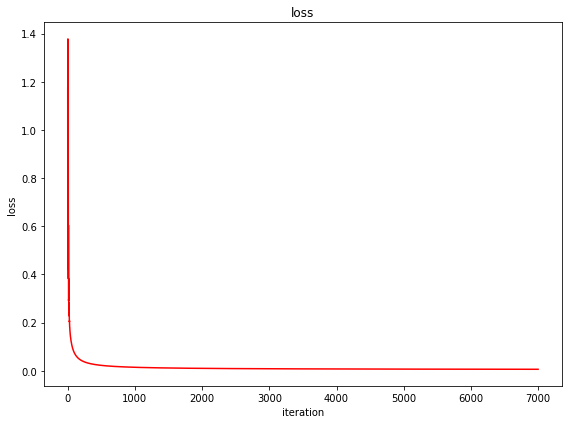

In [1104]:
plot_loss_curve(loss1_iteration)

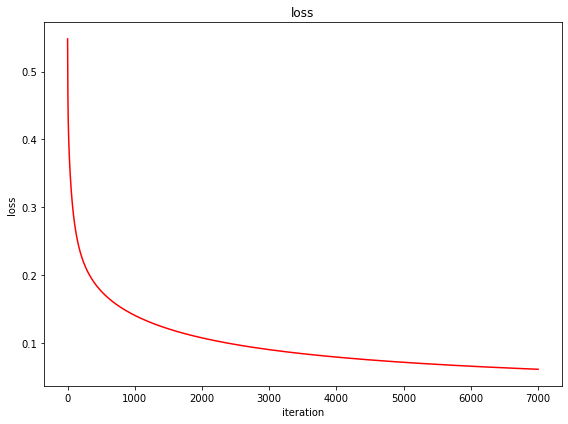

In [1105]:
plot_loss_curve(loss2_iteration)

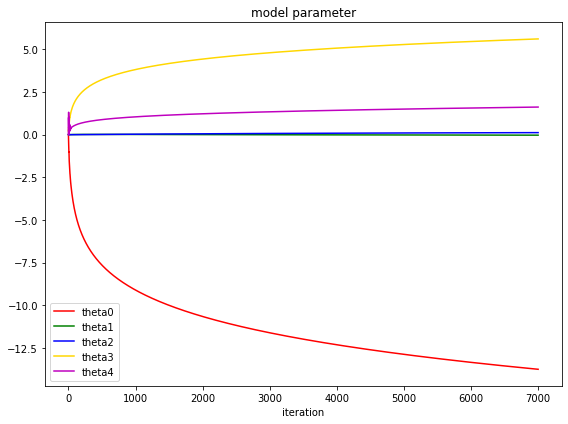

In [1106]:
plot_model_parameter(theta1_iteration)

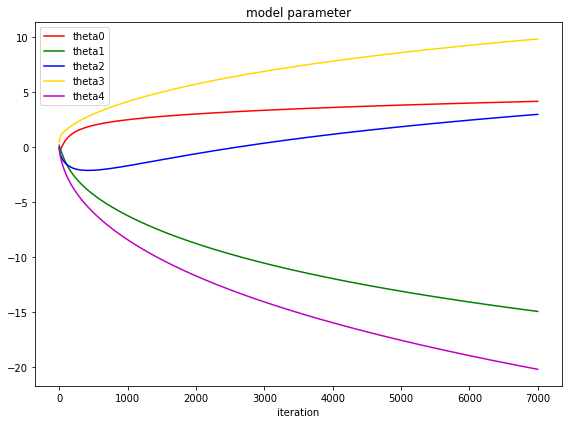

In [1107]:
plot_model_parameter(theta2_iteration)

In [1124]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
        
    t = 0.01
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))
    
    X = xx.ravel()
    Y = yy.ravel()
    
    feature = feature_function1(X, Y)
    h = regression_function(theta, feature)
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,cmap = plt.get_cmap('RdBu_r'),levels = 90, vmin = -25, vmax = 25)
    plt.colorbar(cntr) 

    plt.scatter(data[:, 0][label_1 == 1],data[:, 1][label_1 == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label_1 == 0],data[:, 1][label_1 == 0], c="b", marker=".",label="class 0 ")
    
    plt.contour(xx,yy,Z,levels=[0],colors ="black")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [1109]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    t = 0.01
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))
    
    X = xx.ravel()
    Y = yy.ravel()
    
    feature = feature_function2(X, Y)
    h = regression_function(theta, feature)
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,cmap =  plt.get_cmap('RdBu_r') ,levels = 90, vmin = -25, vmax = 25)
    plt.colorbar(cntr)    
    

    plt.scatter(data[:, 0][label_2 == 1],data[:, 1][label_2 == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label_2 == 0],data[:, 1][label_2 == 0], c="b", marker=".",label="class 0 ")
    
    plt.contour(xx,yy,Z,levels=[0],colors ="black")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

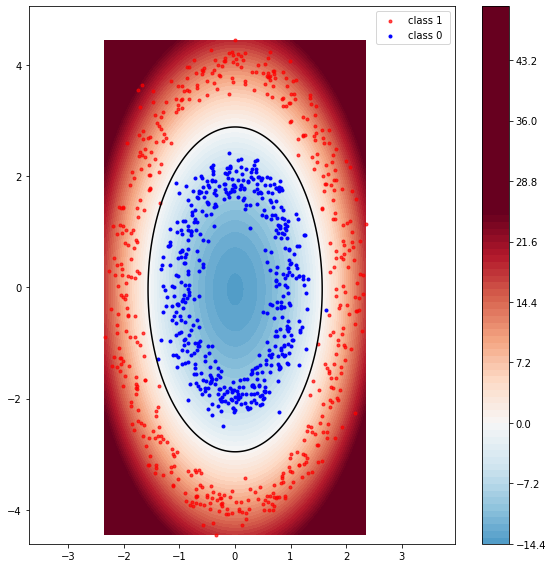

In [1125]:
plot_classifier1(data1, theta1_optimal)

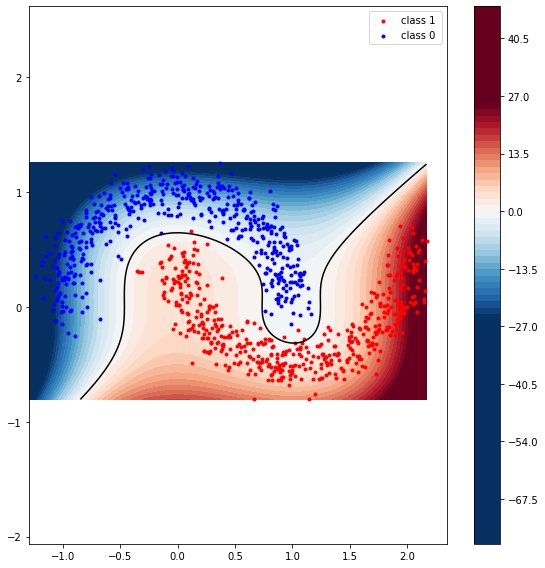

In [1111]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

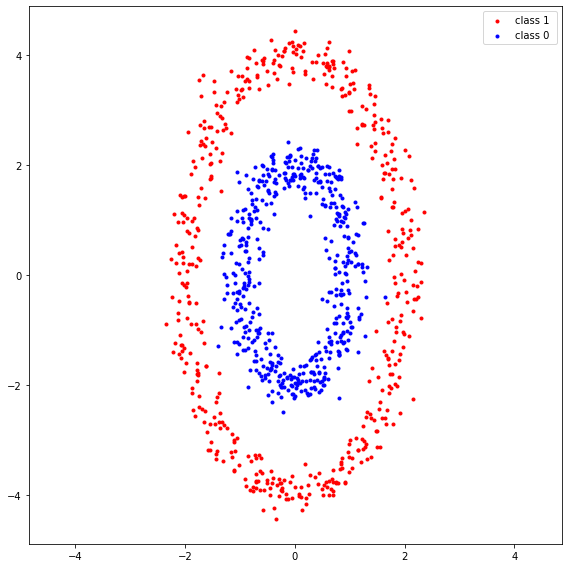

In [1112]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

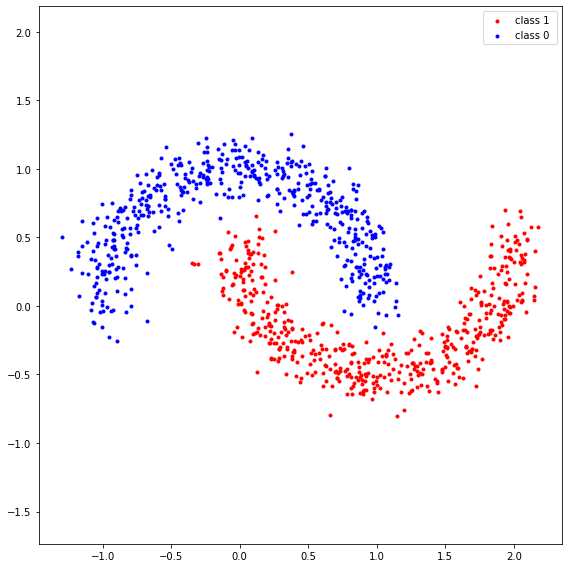

In [1113]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

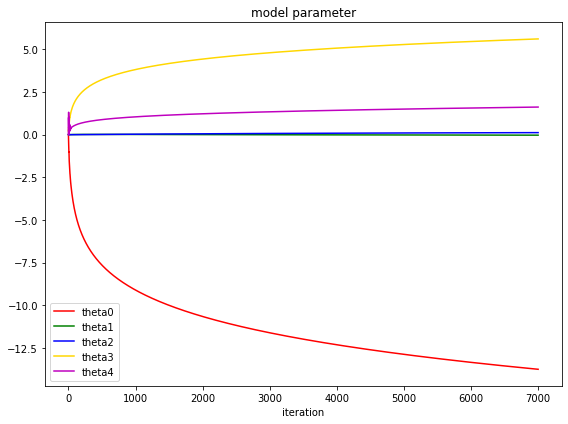

In [1114]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

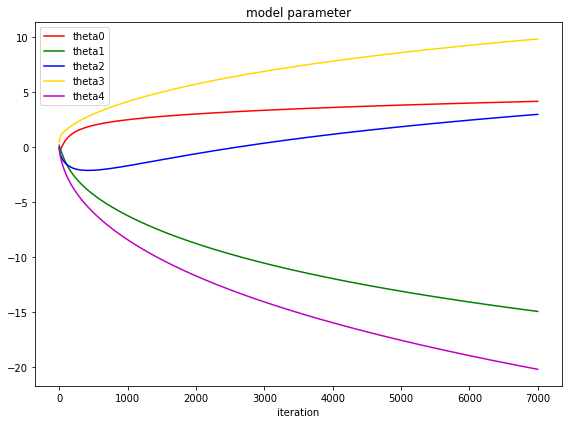

In [1115]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

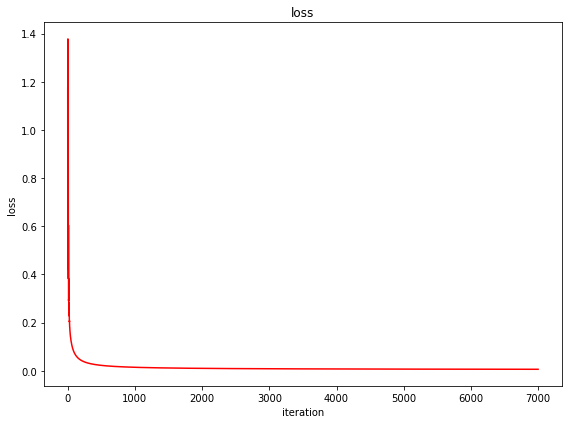

In [1116]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

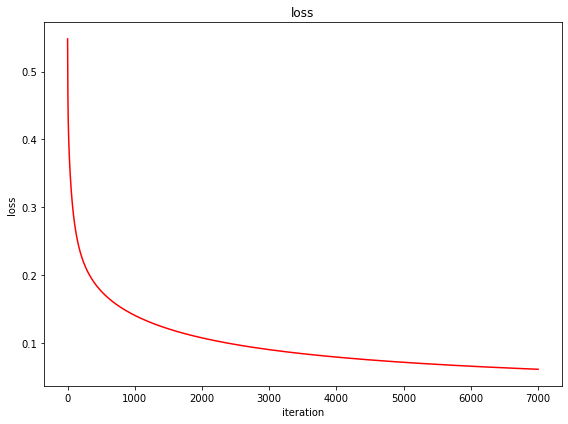

In [1117]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

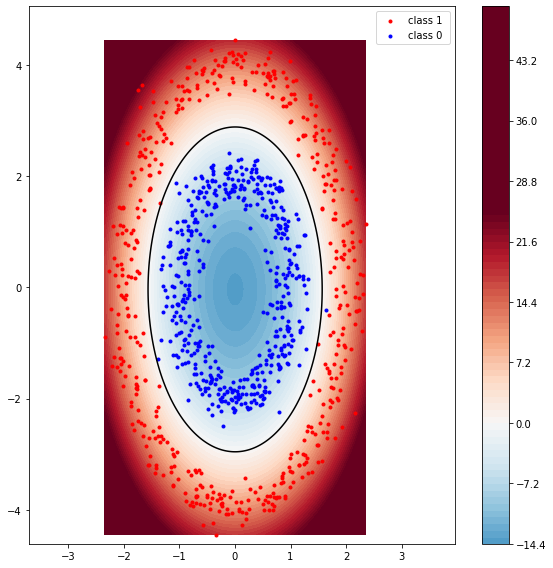

In [1118]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

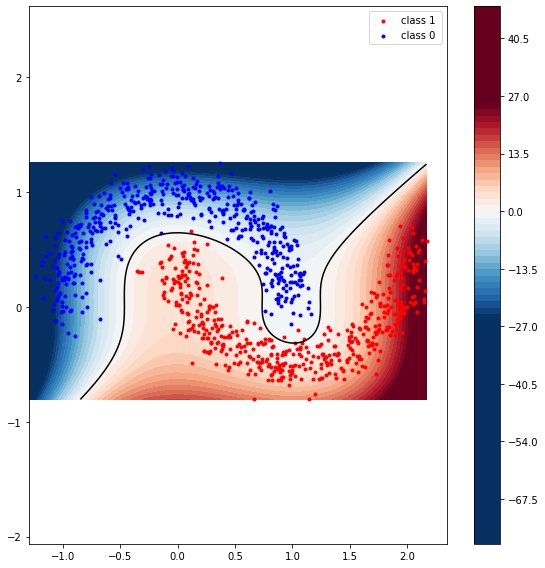

In [1119]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [1120]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [1121]:
print(accuracy_classifier2)

0.996
